### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [3]:
import pandas as pd

df = pd.read_csv('./data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [4]:
# Convert the 'Date/Time' column to datetime format

df['Date/Time']=pd.to_datetime(df['Date/Time'])
# Group by date and count the number of pickups
df['Date'] = df['Date/Time'].dt.date
pickup_counts = df.groupby('Date')['Lat'].count()

# Find the date with the highest number of pickups
date_with_most_pickups = pickup_counts.idxmax()

print("Date with the most number of pickups:", date_with_most_pickups)




Date with the most number of pickups: 2014-08-07


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [5]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
date_with_highest_pickups = pickup_counts.idxmax()


number_of_pickups = pickup_counts[date_with_highest_pickups]

print("Date with the highest number of pickups:", date_with_highest_pickups)
print("Number of Uber pickups on the highest pickup date:", number_of_pickups)

# Get the count of pickups on the highest date




Date with the highest number of pickups: 2014-08-07
Number of Uber pickups on the highest pickup date: 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [3]:
# Count the number of unique TLC base companies
unique_TLC_Company=df['Base'].nunique()
print(unique_TLC_Company)


5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [9]:
# Group by TLC base company and count the number of pickups
# count_by_base=df.groupby('Base').size()
# print(count_by_base)

# Find the TLC base company with the highest number of pickups
pickup_counts = df.groupby('Base')['Lat'].count()
highest_pickup_company = pickup_counts.idxmax()
print("TLC base company with the highest number of pickups:", highest_pickup_company)

TLC base company with the highest number of pickups: B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [10]:
# Group by TLC base company and count the number of pickups
pickup_counts = df.groupby('Base')['Lat'].count()
print(pickup_counts)

Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
Name: Lat, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [13]:
# Extract the hour from the 'Date/Time' column
df['Hour']=df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_counts=df.groupby('Hour').size()
print(pickup_counts)

# Find the hour with the highest number of pickups
busiest_hour=pickup_counts.idxmax()
print('busiest hour is:',busiest_hour)



Hour
0     21451
1     14471
2     10105
3     10376
4     11774
5     16525
6     24907
7     34064
8     34566
9     30195
10    30706
11    31778
12    32106
13    35764
14    40644
15    48197
16    53481
17    57122
18    55390
19    53008
20    51674
21    51354
22    46008
23    33609
dtype: int64
busiest hour is: 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

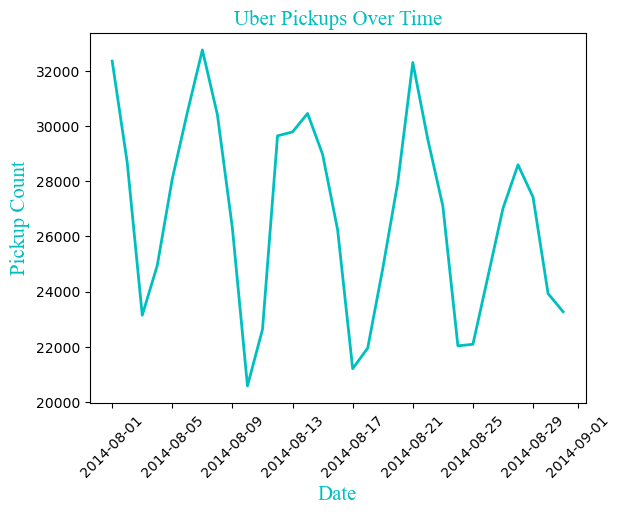

In [11]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_count_by_date = df.groupby('Date')['Lat'].count()

#print(pickup_count_by_date)


# Create a line plot to visualize the number of pickups over time

plt.plot(pickup_count_by_date.index, pickup_count_by_date.values,color= 'c' ,linewidth = 2)

plt.xlabel("Date",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.ylabel("Pickup Count",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.title("Uber Pickups Over Time",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.xticks(rotation=45)
plt.show()





#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

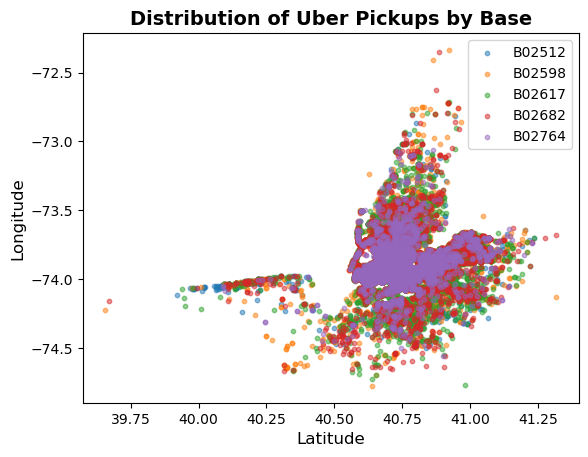

In [12]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
grouped_data = df.groupby('Base')

# Create a scatter plot for each group
for group_name, group_data in grouped_data:
    plt.scatter(group_data['Lat'], group_data['Lon'], label=group_name, s=10, alpha=0.5)

plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.title('Distribution of Uber Pickups by Base', fontsize=14, fontweight='bold')
plt.legend()

plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

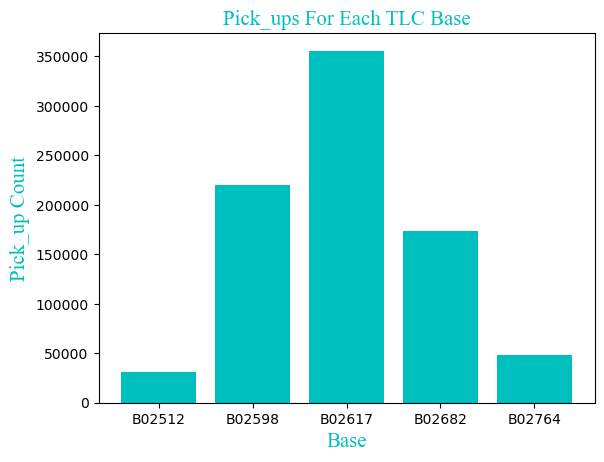

In [13]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickup_count_base = df.groupby('Base')['Lat'].count()
#print(pickup_count_base)
plt.bar(pickup_count_base.index,pickup_count_base.values, color = 'c')
plt.xlabel('Base',fontname = 'times new roman',fontsize = 15,c = 'c')
plt.ylabel('Pick_up Count',fontname = 'times new roman',fontsize = 15,c = 'c')
plt.title('Pick_ups For Each TLC Base',fontname = 'times new roman',fontsize = 15,c = 'c')
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

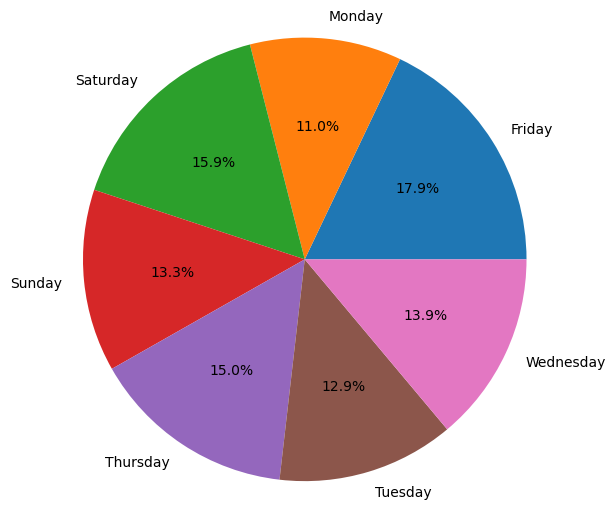

In [15]:
# Group by day of the week and count the number of pickups

busiest_hour = pickup_counts.idxmax()
df['DayOfWeek'] = df['Date/Time'].dt.day_name()
pickup_counts = df.groupby('DayOfWeek')['Lat'].count()
labels = pickup_counts.index
counts = pickup_counts.values
percentages = counts / counts.sum() * 100
plt.pie(percentages, labels=labels, autopct='%0.1f%%',radius=1.5)
plt.show()
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the weekV
